## Infinite Overlapping Mixture Model with Binary clusters

In [60]:
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd

In [3]:
%load_ext autoreload
%autoreload 2
import utils, iomm

### Synthetic Data

In [33]:
#Generate synthetic data
K=10
N=500
D=20
N_iter=200
alpha_prior = 5
burning_period=50

Z = utils.random_z(N,K)
X = utils.random_x(N,D)
theta= utils.random_theta(N,K,D,alpha_prior)

In [34]:
Z

array([[ 1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.]])

In [35]:
X

array([[ 1.,  0.,  1., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  1.],
       [ 0.,  1.,  0., ...,  1.,  1.,  0.],
       ..., 
       [ 1.,  0.,  1., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.]])

In [127]:
theta

array([[  4.52188051e-01,   2.63632536e-03,   8.72159537e-03,
          4.84738737e-01,   3.14881395e-03,   1.73551425e-03,
          1.23032007e-03,   1.95994850e-03,   9.69413546e-01,
          1.08605083e-02,   4.73492346e-02,   7.10072781e-01,
          7.40305051e-03,   4.49021794e-01,   3.72430159e-02,
          7.33275550e-03,   2.19476165e-03,   2.61427037e-03,
          4.33466142e-02,   1.48106201e-03],
       [  9.51936523e-01,   7.45867649e-01,   1.82035602e-04,
          1.33673563e-03,   3.43102424e-01,   6.55556433e-01,
          5.31471518e-03,   2.96914565e-01,   5.16890653e-46,
          6.40745958e-02,   1.16971896e-02,   4.62621035e-03,
          2.14463448e-02,   3.51374067e-01,   2.93895816e-02,
          8.73063722e-01,   4.66086284e-01,   6.14499689e-01,
          4.30027121e-02,   2.12658318e-02],
       [  1.38200939e-03,   1.11730734e-03,   6.10796460e-02,
          9.02741941e-01,   1.41886282e-03,   8.13026170e-03,
          1.63319458e-02,   4.32738769e-02

#### IOMM algorithm

In [139]:
IOMM = iomm.IOMM(N = N, 
                 K = K, 
                 D = D, 
                 N_iter = N_iter, 
                 Z = Z, 
                 X = X, 
                 theta = theta, 
                 alpha_prior = alpha_prior, 
                 omega = 1,
                 copy_rows = 200,
                 burning_period=burning_period)

In [140]:
%%capture
Z_hat,theta_resampled,Z_hat_mean,U_hat = IOMM.learning(apply_log=False,random_walk=False)

In [141]:
Z_hat_mean

array([[ 0.99333333,  0.99333333,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.99333333,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.00666667,  0.        , ...,  0.00666667,
         0.00666667,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.00666667,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [142]:
Z_hat

array([[ 1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [143]:
theta_evol=np.zeros([N_iter,K*D])
theta_evol_mean=np.zeros([N_iter,K*D])
temp=0
ind_evol=0
for n in range(N_iter):
    ind_evol=0
    for d in range(D):
        for k in range(K):
            theta_evol[n,ind_evol]=theta_resampled[n][k,d]
            ind_evol=ind_evol+1

for n in range(N_iter):
    for ind in range(K*D):
        theta_evol_mean[n,ind]=np.sum(theta_evol[:n,ind])/(n+1)

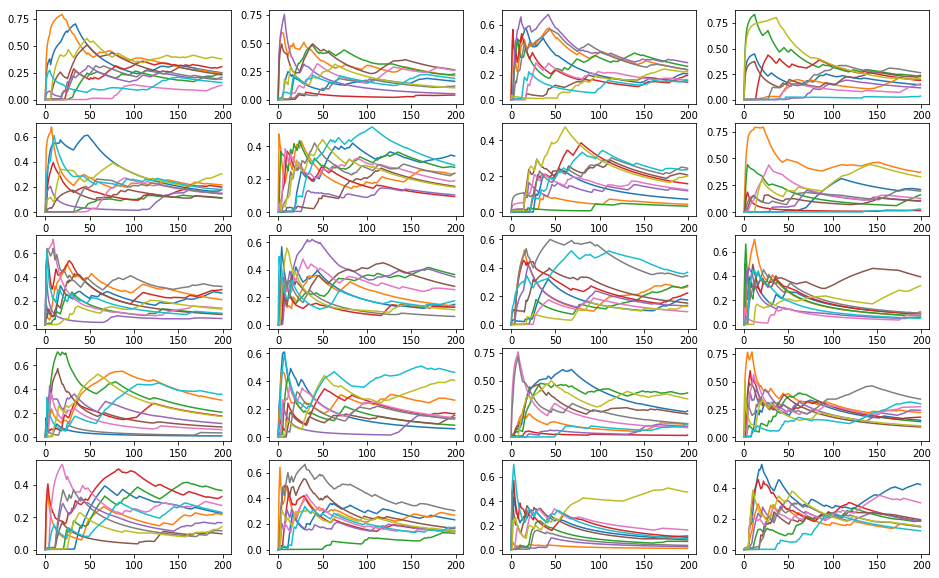

In [144]:
fig=plt.figure(figsize=(16,10))

for d in range(D):
    ax=fig.add_subplot(5,4,d+1)
    for kd in range(K*(d),K*(d+1)):
        ax.plot(range(N_iter),theta_evol_mean[:,kd])
plt.show()

In [145]:
#we compute the U matrix N*N showing the number of shared clusters between each data point
#U_hat=np.around(np.dot(Z_hat_mean,Z_hat_mean.T),0)
#print(U_hat)
U=np.dot(Z,Z.T)
print(U)

[[ 2.  0.  0. ...,  0.  0.  1.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 1.  0.  0. ...,  0.  0.  1.]]


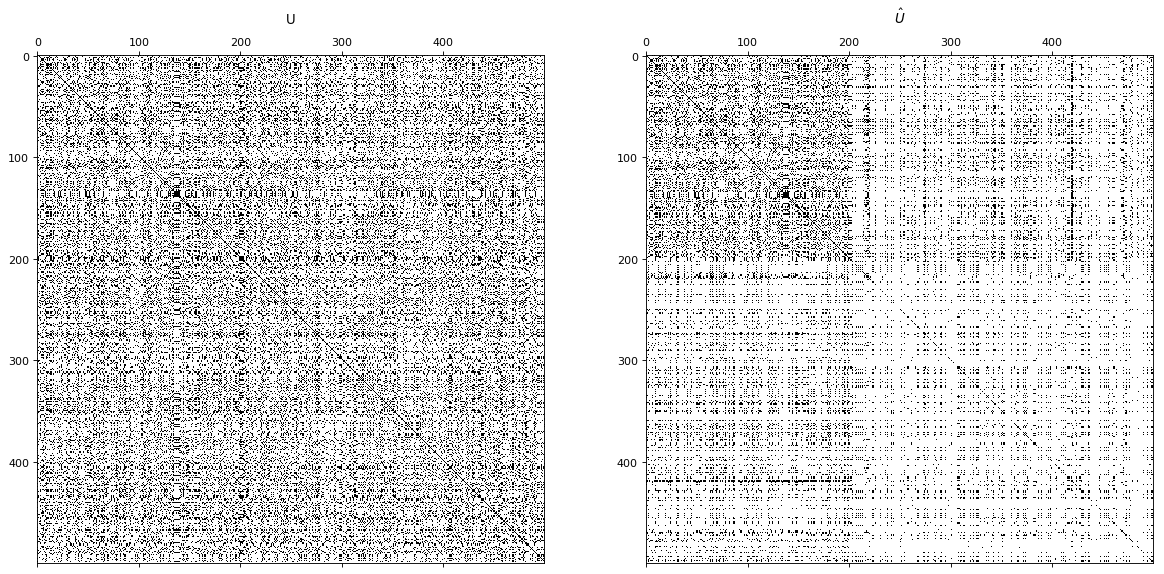

In [146]:
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.title.set_text('U')
ax2.title.set_text('$\hat{U}$')

ax1.spy(U)
ax2.spy(U_hat)

plt.show()

In [147]:
#summmary statistics
U_diff=abs(U-U_hat)
print("% of pairs having same number of clusters:",len(U_diff[U_diff==0])/(N*N))
print("% of pairs having at most 1 cluster difference:",len(U_diff[U_diff<2])/(N*N))
print("% of pairs having at most 2 clusters difference:",len(U_diff[U_diff<3])/(N*N))
print("% of pairs having at most 3 clusters difference:",len(U_diff[U_diff<4])/(N*N))

% of pairs having same number of clusters: 0.716616
% of pairs having at most 1 cluster difference: 0.994756
% of pairs having at most 2 clusters difference: 0.999984
% of pairs having at most 3 clusters difference: 1.0


In [63]:
%%capture
#boxplot des U_diff
cols = ["zero", "one", "two", "three"]

clusters_differences = {
    cols[0]: [],
    cols[1]: [],
    cols[2]: [],
    cols[3]: [],
}
for i in range(5):
    IOMM = iomm.IOMM(N = N, 
                     K = K, 
                     D = D, 
                     N_iter = N_iter, 
                     Z = Z, 
                     X = X, 
                     theta = theta, 
                     alpha_prior = alpha_prior, 
                     omega = 1,
                     copy_rows = 200,
                     burning_period=burning_period)
    Z_hat,theta_resampled,Z_hat_mean,U_hat = IOMM.learning(apply_log=False,random_walk=False)
    U_hat_new = np.copy(U_hat)
    U_diff=abs(U-U_hat_new)
    clusters_differences['zero'].append(len(U_diff[U_diff==0])/(N*N))
    clusters_differences['one'].append(len(U_diff[U_diff<2])/(N*N))
    clusters_differences['two'].append(len(U_diff[U_diff<3])/(N*N))
    clusters_differences['three'].append(len(U_diff[U_diff<4])/(N*N))
    


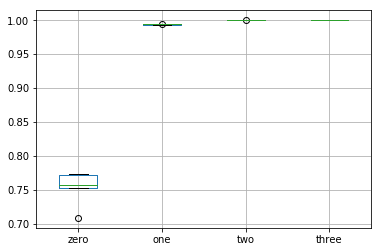

In [71]:
clusters_differences_df = pd.DataFrame.from_dict(clusters_differences)[cols]
#clusters_differences_df.head()
clusters_differences_df.boxplot()

In [63]:
%%capture
#evaluation de la constante norm_lh/c
for i in range(5):
    IOMM = iomm.IOMM(N = N, 
                     K = K, 
                     D = D, 
                     N_iter = N_iter, 
                     Z = Z, 
                     X = X, 
                     theta = theta, 
                     alpha_prior = alpha_prior, 
                     omega = 1,
                     copy_rows = 200,
                     burning_period=burning_period)
    Z_hat,theta_resampled,Z_hat_mean,U_hat = IOMM.learning(apply_log=False,random_walk=False)
    U_hat_new = np.copy(U_hat)
    U_diff=abs(U-U_hat_new)
    print(len(U_diff[U_diff==0])/(N*N))
    
